In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
dflat1 = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack1.txt', delimiter='\t')
dflat2 = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack2.txt', delimiter='\t')
dflat3 = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack3.txt', delimiter='\t')
dflat4 = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack4.txt', delimiter='\t')
dflat5 = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack5.txt', delimiter='\t')
dflat = np.concatenate((dflat1,dflat2,dflat3,dflat4,dflat5))
print(dflat.shape)

(10000, 14641)

In [5]:
dflat_train = dflat[0:8000, :].reshape((8000, 121, 121,1))
print(dflat_train.shape)
dflat_test = dflat[8000:10000,:].reshape((2000, 121, 121,1))
print(dflat_test.shape)

(8000, 121, 121, 1)

In [10]:
shift = np.loadtxt('E:\\Box Sync\\Lab\\20191203_diskdetection_ml\\4_Bloch_Si_tiltseries_4_largeCL\\diskStack_shift.txt', delimiter='\t')
shiftx_train = shift[0:8000,0]
shiftx_test = shift[8000:10000,0]
print(shiftx_train.shape)
print(shiftx_test.shape)

(8000,)
(2000,)


-4.056


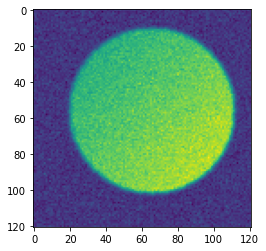

In [15]:
i_disk = 3749
plt.imshow(dflat_train[i_disk][:,:,0])
print(shiftx_train[i_disk])

In [16]:
print(shiftx_train.min())
print(shiftx_train.max())
print(shiftx_test.min())
print(shiftx_test.max())

-12.0
12.0
-12.0
11.98


In [18]:
model = tf.keras.Sequential([
    keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(121,121,1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(8, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
#     keras.layers.Dense(units=512, activation='relu'),
#     keras.layers.Dropout(0.2),
#     keras.layers.Dense(units=256, activation='relu'),
#     keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 119, 119, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [19]:
history = model.fit(dflat_train, shiftx_train, epochs=50, validation_data=(dflat_test, shiftx_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 27s 3ms/sample - loss: 4.1092 - val_loss: 0.2411
Epoch 2/50
8000/8000 [==============================] - 28s 4ms/sample - loss: 0.1278 - val_loss: 0.0796
Epoch 3/50
8000/8000 [==============================] - 28s 4ms/sample - loss: 0.0627 - val_loss: 0.0606
Epoch 4/50
8000/8000 [==============================] - 25s 3ms/sample - loss: 0.0400 - val_loss: 0.0331
Epoch 5/50
8000/8000 [==============================] - 25s 3ms/sample - loss: 0.0350 - val_loss: 0.0308
Epoch 6/50
8000/8000 [==============================] - 28s 4ms/sample - loss: 0.0260 - val_loss: 0.0254
Epoch 7/50
8000/8000 [==============================] - 30s 4ms/sample - loss: 0.0253 - val_loss: 0.0254
Epoch 8/50
8000/8000 [==============================] - 28s 3ms/sample - loss: 0.0235 - val_loss: 0.0244
Epoch 9/50
8000/8000 [==============================] - 25s 3ms/sample - loss: 0.0209 - val_loss: 0.0167
Epoch 1

In [20]:
err_train = model.predict(dflat_train).flatten() - shiftx_train
# print(err_train.shape)
print('Mean absolute error (training data): '+str(np.mean(np.absolute(err_train))))
print('Root mean squared error (training data): '+str(np.sqrt(np.mean(np.square(err_train)))))
err_test = model.predict(dflat_test).flatten() - shiftx_test
# print(err_test.shape)
print('Mean absolute error (test data): '+str(np.mean(np.absolute(err_test))))
print('Root mean squared error (test data): '+str(np.sqrt(np.mean(np.square(err_test)))))

Mean absolute error (training data): 0.06543712914736571
Root mean squared error (training data): 0.07815109231286729
Mean absolute error (test data): 0.07650802823113752
Root mean squared error (test data): 0.09848511897692616


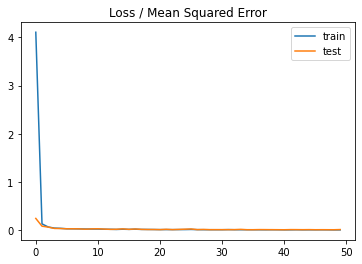

In [21]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
model.save('saved_model\\train_cnn_121x121.h5')

In [27]:
md1 = keras.models.load_model('saved_model\\train_cnn_121x121.h5')
md1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 119, 119, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 57, 57, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [29]:
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*5,col_size*1.2))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index]1)11
            activation_index += 1

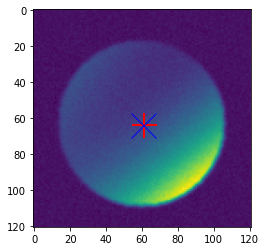

In [85]:
i_disk = 6743
center = np.zeros(2)
center[0] = model.predict(dflat_train[i_disk].reshape(1,121,121,1)).flatten()
center[1] = model.predict(dflat_train[i_disk].transpose().reshape(1,121,121,1)).flatten()
fig, ax = plt.subplots()
ax.imshow(dflat_train[i_disk][:,:,0])
ax.plot(61+center[1], 61+center[0], 'r+', markersize=25, markeredgewidth=2)
ax.plot(61+shift[i_disk,1], 61+shift[i_disk,0], 'bx', markersize=25, markeredgewidth=1)

from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in md1.layers]
activation_model = Model(inputs=md1.input, outputs=layer_outputs)
activations = activation_model.predict(dflat_train[i_disk].reshape(1,121,121,1))

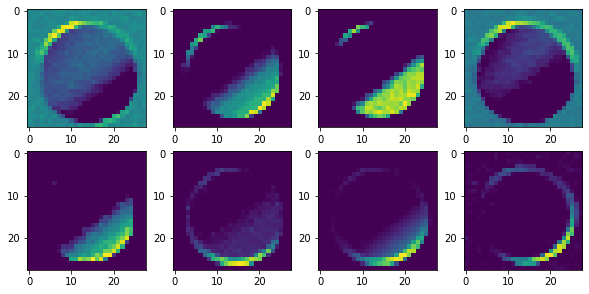

In [89]:
display_activation(activations, 4, 2, 3)